# Powertrain for UAV

In [18]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from scipy.integrate import quad, ode, odeint
from scipy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import gym
import json
from systems.powertrain import *
np.random.seed(43)

### The Continuous Battery Cell
Load profiles, parameters
- predefined curves must be derived emperically 

In [100]:
# only if curves need updated
# # load the battery curves
# battery_profiles = get_battery_curves('soc_ocv.csv', 'R0_degradation.csv', 'Q_degradation.csv')
# battery_profiles
# with open('params/battery_curves.json', 'w') as f:
#     json.dump(battery_profiles, f)

#### load battery params from json 

In [3]:
#with open('params/battery_params.json') as f:
#with open('params/tmp/battery1_0-0_3-8695.json') as f:
with open('params/battery1/14Dec20_13-00-50.json') as f:
    battery_params = json.load(f)
#battery_params

### create the battery cell

In [12]:
cbcell = ContinuousBatteryCell(**battery_params)

Using [ battery1 - 14Dec20_13-00-50] parameters


In [96]:
cbcell.period
ct = 1/3600*cbcell.period
dt = cbcell.nsteps(ct)

c = 3.8695

In [111]:
#cbcell.cycle_flag = True
obs, reward, done, info = cbcell.step(dt, c)
    #print(cbcell.age, cbcell.avg_load, cbcell.cycle_time, cbcell.z)
    
print(done)
print(cbcell.age, cbcell.z)

58.04250000000001
False
0.0 0.9958338501266075


In [126]:
cbcell.period = .05

In [212]:
cbcell.save_state()

### plot the battery profile curves
- q degradation
- r0 degradation
- soc ocv curve

4.052408561253653
0.013503516031979206
3.865514026190776


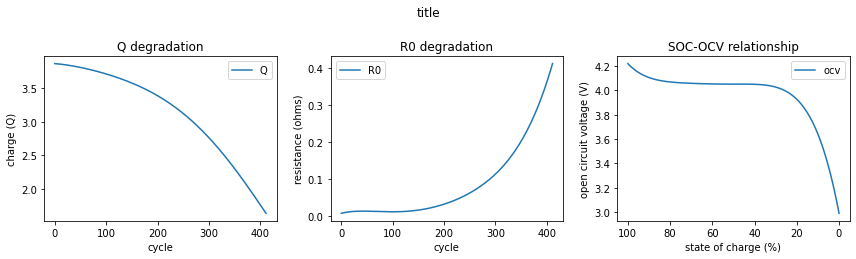

In [23]:
# shows that profile curves are continuous
print(cbcell.get_v(z=45.32434))
print(cbcell.get_r0(age=123.232))
print(cbcell.get_q(age=.973))

plot_q = np.array([np.arange(0, cbcell.eol), np.polyval(cbcell.q_coef, np.arange(0, cbcell.eol))])
plot_r = np.array([np.arange(0, cbcell.eol), np.polyval(cbcell.r0_coef, np.arange(0, cbcell.eol))])
plot_z = np.array([np.arange(0, 101), np.polyval(cbcell.z_coef, np.arange(0, 101))])

three_plot(plot1=plot_q, plot2=plot_r, plot3=plot_z, 
           label1=["Q"], label2=["R0"], label3=["ocv"], 
           title1="Q degradation", title2="R0 degradation", title3="SOC-OCV relationship",
           axes1=["cycle", "charge (Q)"], axes2=["cycle", "resistance (ohms)"], axes3=["state of charge (%)", "open circuit voltage (V)"],
           invert=[0,0,1], save=True, filename="figures/battery_profile_curves.png")

### EOD simulation

In [214]:
# simulate until EOD
#cbcell.Q = 4.2
print(type(2))
print(type(int))

<class 'int'>
<class 'type'>


3.4985433333333518
407.0
1.2893894348894417
run: 0	Q: 3.799	R0: 0.014	avg_load: 30.870	cycle_time: 407	age: 61.515	eol: 412


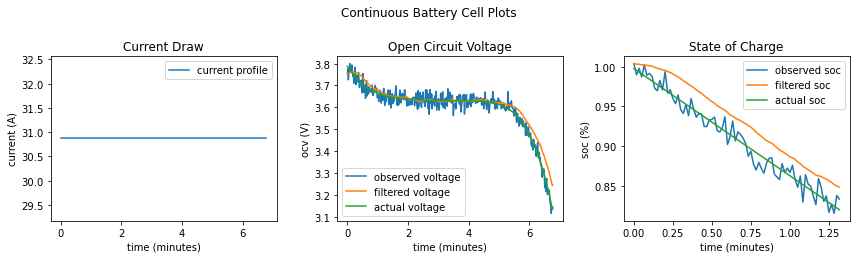

In [46]:
cycle_test(cell=cbcell, dt=1.0, c=30.8695,random_load=False, verbose=1,show_plot=True, reset=True, action=1)#, save_plot=True, file_name="figures/continuous_cell_test2.png")

### Charging simulation

3.463202500000277
3221.0
0.16127922229122682
run: 0	Q: 3.810	R0: 0.014	avg_load: 3.870	cycle_time: 3221	age: 49.525	eol: 412


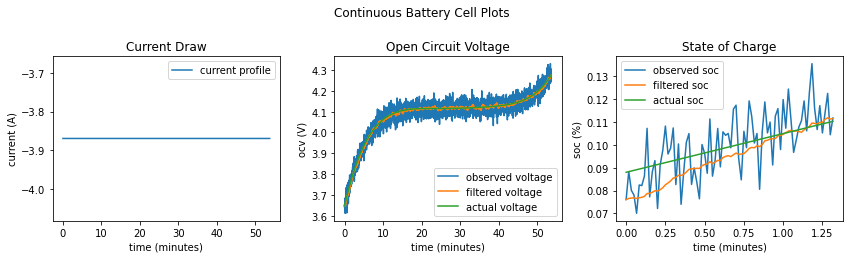

In [42]:
cycle_test(cell=cbcell, random_load=False, verbose=1, show_plot=True, reset=False, action=0)#, save_plot=True, file_name="figures/continuous_cell_charging.png")


### EOL simulation

Using [ battery1 - 14Dec20_13-00-50] parameters
3.789696237854464
run: 1	Q: 3.865	R0: 0.011	avg_load: 3.402	cycle_time: 4009	age: 0.769	eol: 412
3.7716876388892273
run: 0	Q: 3.866	R0: 0.011	avg_load: 3.870	cycle_time: 3508	age: 0.938	eol: 412
3.7686166670278642
run: 2	Q: 3.866	R0: 0.011	avg_load: 4.083	cycle_time: 3322	age: 1.799	eol: 412
3.7684630555558933
run: 0	Q: 3.865	R0: 0.011	avg_load: 3.870	cycle_time: 3505	age: 1.968	eol: 412
3.7733994548879712
run: 3	Q: 3.865	R0: 0.011	avg_load: 3.126	cycle_time: 4345	age: 2.647	eol: 412
3.7727625000003386
run: 0	Q: 3.864	R0: 0.011	avg_load: 3.870	cycle_time: 3509	age: 2.816	eol: 412
3.7643213481600166
run: 4	Q: 3.864	R0: 0.011	avg_load: 4.738	cycle_time: 2859	age: 3.820	eol: 412
3.7630887500003367
run: 0	Q: 3.864	R0: 0.011	avg_load: 3.870	cycle_time: 3500	age: 3.989	eol: 412
3.7710026353800528
run: 5	Q: 3.864	R0: 0.011	avg_load: 3.008	cycle_time: 4512	age: 4.612	eol: 412
3.770612777778116
run: 0	Q: 3.863	R0: 0.011	avg_load: 3.870	cycle_time:

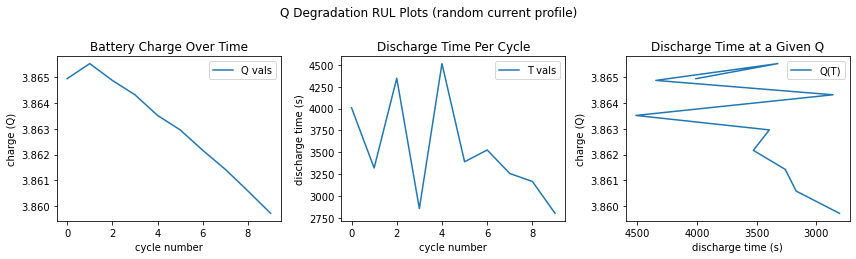

In [19]:
# create the cell
# with open('params/battery_params.json') as f:
#     battery_params = json.load(f)
cbcell = ContinuousBatteryCell(**battery_params)

# define some data containers
q_vals = []
t_vals = []
run_num = 1

# simulate until EOL
while(cbcell.age < 10):#.9*cbcell.eol):
    # discharge
    cycle_test(cell=cbcell, random_load=True, reset=False,verbose=1, dt=1.0, run_num=run_num, q_vals=q_vals, t_vals=t_vals)
    # charge
    cycle_test(cell=cbcell, random_load=False, verbose=1, show_plot=False, reset=False, action=0)
    run_num += 1

    # plot the results
three_plot(title="Q Degradation RUL Plots (random current profile)", figsize=(12,4), 
           plot1=np.array([np.arange(0, len(q_vals)), np.array(q_vals)]),
           plot2=np.array([np.arange(0, len(t_vals)), np.array(t_vals)]), 
           plot3=np.array([np.array(t_vals), np.array(q_vals)]),
           label1=["Q vals"],
           label2=["T vals"],
           label3=["Q(T)"],
           title1="Battery Charge Over Time",
           title2="Discharge Time Per Cycle",
           title3="Discharge Time at a Given Q",
           axes1=['cycle number', 'charge (Q)'],
           axes2=['cycle number', 'discharge time (s)'],
           axes3=['discharge time (s)', 'charge (Q)'],
           invert = [0,0,1],
           save=False,
           filename="figures/rul_plots_random_load.png")

In [18]:
t_vals[1]

3506